In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import mean_squared_error

# 1a.

In [6]:
def w_calc(w, b, x):
    if (w.dot(x) + b >= 0):
        return 1
    else: 
        return -1

In [3]:
def updates(X, y):
    X = np.random.permutation(X)
    w = np.zeros(len(X[0]))
    b = 0
    alpha = 1

    for i, j in zip(x_feat, y_feat):  
        pred = w_calc(w, b, i)      
        if (j == pred):    
            continue                      
        else:
            w = w + alpha*(j - pred) * i 
            b = b + alpha*(j - pred)  
            
    return w, b

# 1b.

In [4]:
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [5]:
x_rest = np.concatenate((x[:, 1].reshape(150,1), x[:, 3].reshape(150,1)), axis=1)

In [6]:
data = np.concatenate((x_rest, y.reshape(150,1)), axis=1)

In [7]:
data = np.delete(data, np.where(
    (data[:, 2] == 2)), axis=0)

In [8]:
x_feat = np.concatenate((data[:, 0].reshape(100,1), data[:, 1].reshape(100,1)), axis=1)
y_feat = data[:, 2]
y_feat[y_feat == 0] = -1

In [9]:
y_feat

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

# 1c.

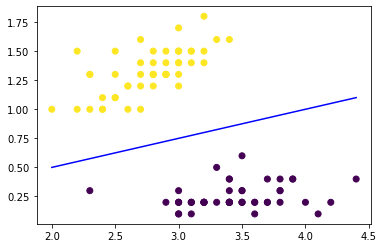

In [10]:
plt.scatter(x=x_feat[:, 0], y=x_feat[:, 1], c=y_feat)

w, b = updates(x_feat, y_feat)     
x_points = np.linspace(min(x_feat[:, 0]),max(x_feat[:, 0]))    
y_points = -w[0]*x_points/w[1]-b/w[1]


plt.plot(x_points, y_points, c='b');

# 1d.

In [11]:
def updates(X, y):
    X = np.random.permutation(X)
    w = np.zeros(len(X[0]))
    b = 0
    alpha = 1
    count = 0

    for i, j in zip(X, y):  
        pred = w_calc(w, b, i)      
        if (j == pred):    
            continue                      
        else:
            w = w + alpha*(j - pred) * i 
            b = b + alpha*(j - pred)  
            count = count + 1
            
    return w, b, count

In [12]:
num_update = []

W = np.zeros(len(x_feat[0]))
b = 0

counter= 0
while counter < 20:
    # change the applied function below
    w,b,count = updates(x_feat, y_feat)
    num_update.append(count)
    counter += 1
    
num_update

[2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3]

(array([ 9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11.]),
 array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ]),
 <BarContainer object of 10 artists>)

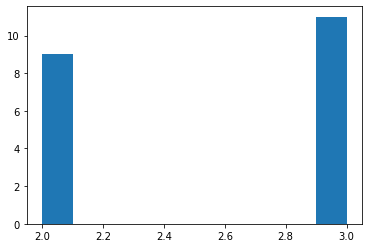

In [13]:
plt.hist(num_update)

# 2a.

In [14]:
x_rest = np.concatenate((x[:, 0].reshape(150,1), x[:, 2].reshape(150,1)), axis=1)

In [15]:
data = np.concatenate((x_rest, y.reshape(150,1)), axis=1)

In [16]:
data = np.delete(data, np.where((data[:, 2] == 0)), axis=0)

In [17]:
x_feat = np.concatenate((data[:, 0].reshape(100,1), data[:, 1].reshape(100,1)), axis=1)
y_feat = data[:, 2]

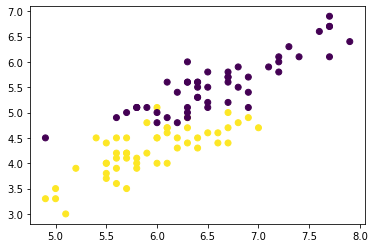

In [18]:
plt.scatter(x_feat[:,0], x_feat[:,1], c = (y_feat == 1))
plt.show()

No this data is not linearly separable.

# 2b.

In [19]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x_feat, y_feat, test_size=0.2,random_state=0) 

In [20]:
c = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
training_error = []
support_vector_num = []

for i in range(len(c)):
    clf = svm.SVC(kernel='linear', C=c[i]) 
    clf.fit(X_train, y_train)
    support_vector_num.append(len(clf.support_vectors_))
    y_pred = clf.predict(X_train)
    training_error.append(mean_squared_error(y_train,y_pred))

In [21]:
C = np.array(c).reshape(10,1)
TE = np.array(training_error).reshape(10,1)
SVN = np.array(support_vector_num).reshape(10,1)

In [22]:
answers = np.concatenate((C, TE, SVN), axis=1)
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
answers

array([[0.000100, 0.162500, 80.000000],
       [0.001000, 0.162500, 80.000000],
       [0.010000, 0.162500, 76.000000],
       [0.100000, 0.062500, 46.000000],
       [1.000000, 0.050000, 24.000000],
       [10.000000, 0.025000, 13.000000],
       [100.000000, 0.037500, 8.000000],
       [1000.000000, 0.037500, 7.000000],
       [10000.000000, 0.037500, 7.000000],
       [100000.000000, 0.037500, 6.000000]])

# 2c.

The c value of 10 is the best because it has the lowest training error.

In [23]:
clf = svm.SVC(kernel='linear', C=10) 
clf.fit(X_train, y_train)

SVC(C=10, kernel='linear')

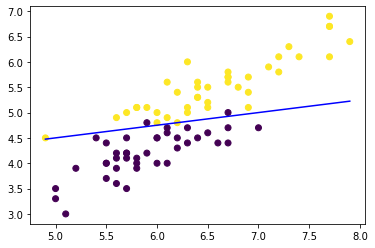

In [24]:
plt.scatter(x=X_train[:, 0], y=X_train[:, 1], c=y_train)

w = clf.coef_[0]          
b = clf.intercept_[0]      
x_points = np.linspace(min(X_train[:, 0]), max(X_train[:, 0]))    
y_points = -(w[0] / w[1]) * x_points - b / w[1]  
plt.plot(x_points, y_points, c='b');